# 20152410 배형준 머신러닝 과제4

In [66]:
# library import

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 1. Plot the estimated parameters using the training dataset

In [67]:
# set my local working directory

import os

directory = 'C:\\Users\\golds\\Desktop\\중앙대학교\\2020-1 4학년 1학기\\머신러닝'
os.chdir(directory)

In [77]:
train_directory = './과제4/data_train.csv'
test_directory = './과제4/data_test.csv'

train = pd.read_csv(train_directory, header=None)
test = pd.read_csv(test_directory, header=None)

column_name = ['x', 'y', 'z', 'h']
train.columns = column_name
test.columns = column_name

X_train = train.iloc[:, 0:3]
X_test = test.iloc[:, 0:3]
Y_train = train.iloc[:, 3]
Y_test = test.iloc[:, 3]

In [78]:
train.head()

,x,y,z,h
0,0.273548,-8.932102,18.708684,73.578825
1,5.403327,4.782977,-18.762210,-56.410433
2,0.029941,-3.245916,6.932498,52.390768
3,3.047974,0.715211,-1.965419,-6.936295
4,1.302074,-5.871807,-15.702181,-34.997017


In [79]:
test.head()

,x,y,z,h
0,-1.788894,-2.717927,-4.425695,-14.055818
1,2.958174,4.515505,6.644435,20.504905
2,-0.569490,10.096246,-13.270292,-73.843148
3,4.279318,2.747878,-5.857125,-24.644937
4,0.125975,-4.349421,5.777460,31.934657


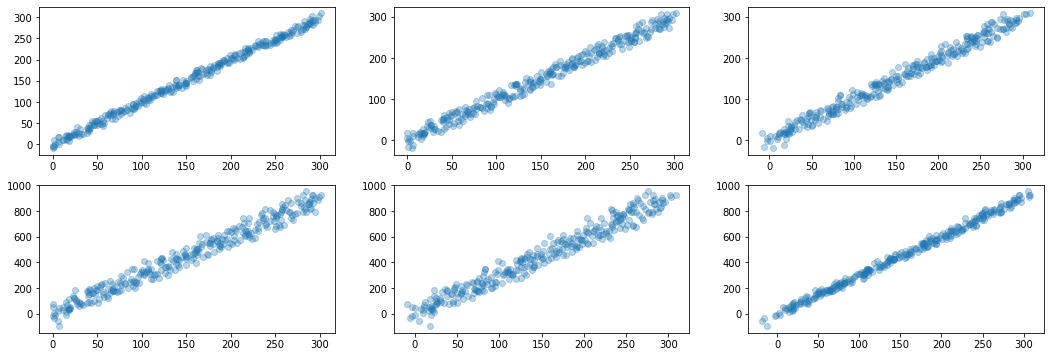

In [80]:
plt.figure(figsize=(18, 6))
plt.subplot(231)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.subplot(232)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 2], alpha=0.3)
plt.subplot(233)
plt.scatter(X_train.iloc[:, 1], X_train.iloc[:, 2], alpha=0.3)
plt.subplot(234)
plt.scatter(X_train.iloc[:, 0], Y_train, alpha=0.3)
plt.subplot(235)
plt.scatter(X_train.iloc[:, 1], Y_train, alpha=0.3)
plt.subplot(236)
plt.scatter(X_train.iloc[:, 2], Y_train, alpha=0.3)
plt.show()

In [93]:
def make_regression(X_train, Y_train, X_test, Y_test):
    
    # set random initial condition of parameters
    
    m = len(Y_train)
    n = len(Y_test)
    X_train = np.hstack((np.ones((m, 1)), np.array(X_train)))
    X_test = np.hstack((np.ones((n, 1)), np.array(X_test)))
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)
    
    initial_theta = np.random.randn(4, 1)
    record_theta = initial_theta.T
    
    initial_train_loss = (Y_train - X_train.dot(initial_theta)).T.dot(Y_train - X_train.dot(initial_theta)) / (2*m)
    initial_test_loss = (Y_test - X_test.dot(initial_theta)).T.dot(Y_test - X_test.dot(initial_theta)) / (2*n)
    
    list_train_loss = [float(initial_train_loss)]
    list_test_loss = [float(initial_test_loss)]

    temp_theta = initial_theta
    temp_train_loss = initial_train_loss
    
    learning_rate = 0.0001
    error_bound = 0.001

    # model learning

    for i in range(500):
        # calculate gradient
        gradient_theta = (X_train.T.dot(X_train).dot(temp_theta) - X_train.T.dot(Y_train)) / m
    
        # renew the parameters
        next_theta = temp_theta - learning_rate * gradient_theta
        temp_theta = next_theta
    
        # calculate loss to evaluate the parameters
        next_train_loss = (Y_train - X_train.dot(next_theta)).T.dot(Y_train - X_train.dot(next_theta)) / (2*m)
        test_loss = (Y_test - X_test.dot(next_theta)).T.dot(Y_test - X_test.dot(next_theta)) / (2*n)
    
        # store results
        record_theta = np.vstack((record_theta, temp_theta.T))
        list_train_loss.append(float(next_train_loss))
        list_test_loss.append(float(test_loss))
        
        # stopping rule
        if temp_train_loss > next_train_loss and temp_train_loss - next_train_loss < error_bound:
                break
        if len(list_train_loss) > 250:
            if list_train_loss[-1] > list_train_loss[-10]:
                break
                
        temp_train_loss = next_train_loss
    
    result_theta = record_theta[-1, :]
    
    return result_theta, record_theta, list_train_loss, list_test_loss

In [94]:
result_theta, record_theta, list_train_loss, list_test_loss = make_regression(X_train, Y_train, X_test, Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract


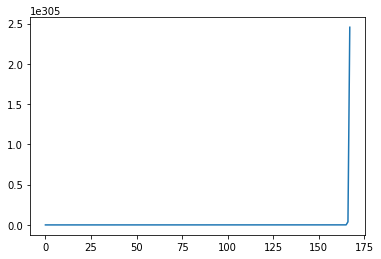

In [95]:
plt.plot(list_train_loss)
plt.show()

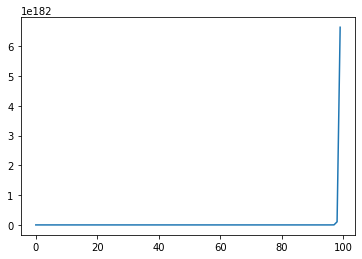

In [96]:
plt.plot(list_train_loss[:100])
plt.show()

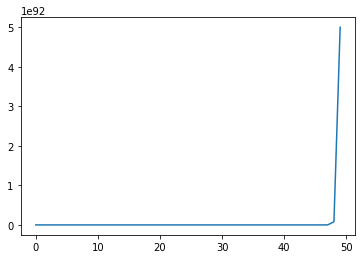

In [97]:
plt.plot(list_train_loss[:50])
plt.show()